# Определение перспективного тарифа для телеком компании.

Компания «Мегалайн» — федеральный оператор сотовой связи.Наша задача разобраться какой из двух тарифных планов «Смарт» или «Ультра» более прибыльный.

## Краткий план действий:
- 1) Знакомство с данными, анализ и проверка на наличие пропусков, аномалий и ошибок
- 2) Предообработка данных.
- 3) Исследовательский анализ данных.
- 4) Формулировка и проверка гипотез.
- 5) Общий вывод и принятие решения.

В нашем распоряжений пять таблиц с данными о пользователях, звонках, сообщениях,интернет трафике и о самих тарифах.

### 1) Знакомство с данными, анализ и проверка на наличие пропусков, аномалий и ошибок

In [1]:
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
df_calls = pd.read_csv('/datasets/calls.csv',sep = ',')
df_calls.info()
df_calls.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [3]:
df_internet = pd.read_csv('/datasets/internet.csv', sep=',')
df_internet.info()
df_internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...,...
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499


In [4]:
df_messages = pd.read_csv('/datasets/messages.csv', sep=',')
df_messages.info()
df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [5]:
df_tariffs = pd.read_csv('/datasets/tariffs.csv', sep=',')
df_tariffs.info()
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [6]:
df_users = pd.read_csv('/datasets/users.csv', sep =',')
df_users.info()
df_users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


###### Вывод

При первом ознакомлении с данными, можно сказать что  явные пропуски есть только в таблице с пользователями, в столбце 'churn_date' - дата прекращения пользования тарифом.Их можно объяснить тем что на момент выгрузки тариф еще действовал. Но стоит так же отметить что есть и нулевые значения в таблице об информации о звонках и интернет трафиком.Думаю что стоит их заменить на среднее значение по каждому пользователю.Их наличие можно объяснить ошибкой при выгрузке данных.

### 2) Предообработка данных.

Заменим нулевые значения в столбцах со значениями длительности звонков, на средние значения по каждому пользователю.


In [7]:
calls_mean_for_each_user = df_calls.pivot_table(index = 'user_id', values = 'duration', aggfunc = 'mean') 
calls_mean_for_each_user.reset_index()

df_calls_new = df_calls.merge(calls_mean_for_each_user, on ='user_id', how = 'left')
df_calls_new.columns = ['id','call_date','duration','user_id','duration_mean_for_user']

def calls_duration_mean(row):
    duration = row['duration']
    duration_mean = row['duration_mean_for_user']
    if duration == 0.0 :
        return duration_mean 
    else:
        return duration
df_calls_new['duration'] = df_calls_new.apply(calls_duration_mean, axis = 1)
df_calls_new

,id,call_date,duration,user_id,duration_mean_for_user
0,1000_0,2018-07-25,6.571304,1000,6.571304
1,1000_1,2018-08-17,6.571304,1000,6.571304
2,1000_2,2018-06-11,2.850000,1000,6.571304
3,1000_3,2018-09-21,13.800000,1000,6.571304
4,1000_4,2018-12-15,5.180000,1000,6.571304
...,...,...,...,...,...
202602,1499_215,2018-12-26,0.760000,1499,6.982818
202603,1499_216,2018-10-18,18.830000,1499,6.982818
202604,1499_217,2018-11-10,10.810000,1499,6.982818
202605,1499_218,2018-10-06,4.270000,1499,6.982818


Заменим нулевые значения в столбцах с количеством используемого трафика, на средние значения по каждому пользователю.

In [8]:
mb_used_for_each_user = df_internet.pivot_table(index = 'user_id', values = 'mb_used', aggfunc = 'mean') 
mb_used_for_each_user.reset_index()

df_internet_new = df_internet.merge(mb_used_for_each_user, on ='user_id', how = 'left')
df_internet_new.columns = ['id1','id','mb_used','session_date','user_id','mb_used_mean_for_user']

def mb_used_mean(row):
    quantity = row['mb_used']
    quantity_mean = row['mb_used_mean_for_user']
    if quantity == 0.0 :
        return quantity_mean 
    else:
        return quantity
df_internet_new['mb_used'] = df_internet_new.apply(mb_used_mean, axis = 1)
del df_internet_new ['id1']
df_internet_new 

,id,mb_used,session_date,user_id,mb_used_mean_for_user
0,1000_0,112.950000,2018-11-25,1000,508.968294
1,1000_1,1052.810000,2018-09-07,1000,508.968294
2,1000_2,1197.260000,2018-06-25,1000,508.968294
3,1000_3,550.270000,2018-08-22,1000,508.968294
4,1000_4,302.560000,2018-09-24,1000,508.968294
...,...,...,...,...,...
149391,1499_152,318.900000,2018-10-03,1499,322.631529
149392,1499_153,490.130000,2018-12-14,1499,322.631529
149393,1499_154,322.631529,2018-10-27,1499,322.631529
149394,1499_155,1246.320000,2018-11-26,1499,322.631529


Переведем в каждой таблице данные с указанием даты к единому формату.
Так же создадим отдельно столбец с указанием месяца.

In [9]:
df_calls_new['call_date'] =  pd.to_datetime(df_calls_new['call_date'], format='%Y.%m.%d')
df_calls_new['month'] = pd.to_datetime(df_calls_new['call_date']).dt.month 
df_calls_new.info()
df_calls_new

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202607 entries, 0 to 202606
Data columns (total 6 columns):
id                        202607 non-null object
call_date                 202607 non-null datetime64[ns]
duration                  202607 non-null float64
user_id                   202607 non-null int64
duration_mean_for_user    202607 non-null float64
month                     202607 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 10.8+ MB


,id,call_date,duration,user_id,duration_mean_for_user,month
0,1000_0,2018-07-25,6.571304,1000,6.571304,7
1,1000_1,2018-08-17,6.571304,1000,6.571304,8
2,1000_2,2018-06-11,2.850000,1000,6.571304,6
3,1000_3,2018-09-21,13.800000,1000,6.571304,9
4,1000_4,2018-12-15,5.180000,1000,6.571304,12
...,...,...,...,...,...,...
202602,1499_215,2018-12-26,0.760000,1499,6.982818,12
202603,1499_216,2018-10-18,18.830000,1499,6.982818,10
202604,1499_217,2018-11-10,10.810000,1499,6.982818,11
202605,1499_218,2018-10-06,4.270000,1499,6.982818,10


In [10]:
df_internet_new['session_date'] =  pd.to_datetime(df_internet_new['session_date'], format='%Y.%m.%d')
df_internet_new['month'] = pd.to_datetime(df_internet_new['session_date']).dt.month 
df_internet_new.info()
df_internet_new


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 6 columns):
id                       149396 non-null object
mb_used                  149396 non-null float64
session_date             149396 non-null datetime64[ns]
user_id                  149396 non-null int64
mb_used_mean_for_user    149396 non-null float64
month                    149396 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 8.0+ MB


,id,mb_used,session_date,user_id,mb_used_mean_for_user,month
0,1000_0,112.950000,2018-11-25,1000,508.968294,11
1,1000_1,1052.810000,2018-09-07,1000,508.968294,9
2,1000_2,1197.260000,2018-06-25,1000,508.968294,6
3,1000_3,550.270000,2018-08-22,1000,508.968294,8
4,1000_4,302.560000,2018-09-24,1000,508.968294,9
...,...,...,...,...,...,...
149391,1499_152,318.900000,2018-10-03,1499,322.631529,10
149392,1499_153,490.130000,2018-12-14,1499,322.631529,12
149393,1499_154,322.631529,2018-10-27,1499,322.631529,10
149394,1499_155,1246.320000,2018-11-26,1499,322.631529,11


In [11]:
df_messages['message_date'] =pd.to_datetime(df_messages['message_date'],format='%Y.%m.%d')
df_messages['month'] = pd.to_datetime(df_messages['message_date']).dt.month 
df_messages.info()
df_messages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12
...,...,...,...,...
123031,1499_179,2018-12-12,1499,12
123032,1499_180,2018-09-28,1499,9
123033,1499_181,2018-09-27,1499,9
123034,1499_182,2018-11-15,1499,11


In [12]:
df_users['churn_date'] =pd.to_datetime(df_users['churn_date'],format='%Y.%m.%d')
df_users['reg_date'] =pd.to_datetime(df_users['reg_date'],format='%Y.%m.%d')
df_users.info
df_users


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaT,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaT,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaT,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


#### В таблице с информацией о тарифах изменение типа данных не требуется

In [13]:
df_tariffs.info()
df_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Создадим таблицу где будут указаны: количество сделанных звонков и израсходованных минут разговора по месяцам,отправленных сообщений по месяцам и объем израсходованного интернет трафика по месяцам.

In [14]:
#print(df_calls)
#print(df_internet)
#print(df_messages)
#print(df_tariffs)
#print(df_users)

pt_calls = df_calls_new.pivot_table(index=['user_id','month'],aggfunc={'id': ['count'],'duration': ['sum']})
pt_calls = pt_calls.reset_index()
pt_internet =df_internet_new.pivot_table(index=['user_id','month'],aggfunc={'mb_used': ['sum']})
pt_internet = pt_internet.reset_index()
pt_messages = df_messages.pivot_table(index=['user_id','month'],aggfunc={'id': ['count']})
pt_messages = pt_messages.reset_index()


pt_users = df_users.pivot_table(index=['user_id','tariff','last_name','city'])
pt_users = pt_users.reset_index()

clients_group =(pt_calls
             .merge(pt_internet, on =['user_id','month'], how = 'left')
             .merge(pt_messages, on =['user_id','month'], how = 'left')
             .merge(pt_users, on ='user_id', how = 'left')
             )
clients_group.columns = ['user_id1','user_id','month','calls_duration',
                         'calls_counts','gb_used','messages','tariff','last_name','city','age']

clients_group['gb_used'] = clients_group['gb_used'].fillna(0)
clients_group['messages'] = clients_group['messages'].fillna(0)

clients_group

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:3946: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)
/opt/conda/lib/python3.7/site-packages/pandas/core/reshape/merge.py:617: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 1 on the right)
  warnings.warn(msg, UserWarning)


,user_id1,user_id,month,calls_duration,calls_counts,gb_used,messages,tariff,last_name,city,age
0,1000,1000,5,182.916522,22,2762.458294,22.0,ultra,Верещагин,Краснодар,52
1,1000,1000,6,257.469565,43,25778.611469,60.0,ultra,Верещагин,Краснодар,52
2,1000,1000,7,358.227826,47,14512.608294,75.0,ultra,Верещагин,Краснодар,52
3,1000,1000,8,455.583043,52,15073.866588,81.0,ultra,Верещагин,Краснодар,52
4,1000,1000,9,518.995652,58,15586.846588,57.0,ultra,Верещагин,Краснодар,52
...,...,...,...,...,...,...,...,...,...,...,...
3169,1498,1498,10,307.283333,41,23787.343621,42.0,smart,Акимчин,Владикавказ,68
3170,1499,1499,9,71.632818,9,2168.381529,11.0,smart,Корнилов,Пермь,35
3171,1499,1499,10,597.497636,68,22627.982930,48.0,smart,Корнилов,Пермь,35
3172,1499,1499,11,660.293818,74,21189.625287,59.0,smart,Корнилов,Пермь,35


---
## Комментарий от наставника

Стоит округлить значения по трафику и длительности разговоров так, как это делает оператор. 

---

Округлим значения в столбцах ''calls_duration'',"messages",  а так же округлим столбец в котором указано количество мегабайт до гигабайт , и так же округлим его данные к большему значению.

In [15]:
def roundup(row):
    return mt.ceil(row)
clients_group['calls_duration'] =clients_group['calls_duration'].apply(roundup)
clients_group['messages'] = clients_group['messages'].apply(roundup)


def gb(mb):
    return mb/1000
clients_group['gb_used']=clients_group['gb_used'].apply(gb)
clients_group['gb_used']=clients_group['gb_used'].apply(roundup)
del clients_group['user_id1']
clients_group

,user_id,month,calls_duration,calls_counts,gb_used,messages,tariff,last_name,city,age
0,1000,5,183,22,3,22,ultra,Верещагин,Краснодар,52
1,1000,6,258,43,26,60,ultra,Верещагин,Краснодар,52
2,1000,7,359,47,15,75,ultra,Верещагин,Краснодар,52
3,1000,8,456,52,16,81,ultra,Верещагин,Краснодар,52
4,1000,9,519,58,16,57,ultra,Верещагин,Краснодар,52
...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,308,41,24,42,smart,Акимчин,Владикавказ,68
3170,1499,9,72,9,3,11,smart,Корнилов,Пермь,35
3171,1499,10,598,68,23,48,smart,Корнилов,Пермь,35
3172,1499,11,661,74,22,59,smart,Корнилов,Пермь,35


---
## Комментарий от наставника

Финальная таблица получена верным образом. Стоит убрать из нее излишнюю информацию в виде фамилии клиента. Такая информация никак не поможет нам в анализе, поэтому хранить ее повторно не стоит.

---

Добавим столбец с месячной выручкой для каждого пользователя с учетом тарифа и стоимости услуг сверх тарифного плана.

In [16]:
def revenue_per_month(row):
    minutes = row['calls_duration']
    messages = row['messages']
    gb = row['gb_used']
    if row['tariff'] =='smart':
        if minutes > 500 and messages > 50 and gb > 15:
            return 550 + ((minutes - 500) * 3) + ((messages - 50) * 3) + ((gb - 15) * 200)
        if minutes <= 500 and messages <= 50 and gb <= 15:
            return 550
        if minutes > 500 and messages > 50 and gb <= 15:
            return 550 + ((minutes - 500) * 3) + ((messages - 50) * 3)
        if minutes > 500 and messages <= 50 and gb > 15:
            return 550 + ((minutes - 500) * 3) + ((gb - 15) * 200)
        if minutes <= 500 and messages > 50 and gb > 15:
            return 550 + ((messages - 50) * 3) + ((gb - 15) * 200)
        if minutes > 500 and messages <= 50 and gb <= 15:
            return 550 + ((minutes - 500) * 3)
        if minutes <= 500 and messages > 50 and gb <= 15:
            return 550 + ((messages - 50) * 3)
        if minutes <= 500 and messages <= 50 and gb > 15:
            return 550 + ((gb - 15) * 200)
    elif row['tariff'] == 'ultra':
        if minutes > 3000 and messages > 1000 and gb > 30:
            return 1950 + ((minutes - 3000) * 3) + ((messages - 1000) * 3) + ((gb - 30) * 200)
        if minutes <= 3000 and messages <= 1000 and gb <= 30:
            return 1950
        if minutes > 3000 and messages > 1000 and gb <= 30:
            return 1950 + ((minutes - 3000) * 3) + ((messages - 1000) * 3) 
        if minutes > 3000 and messages <= 1000 and gb > 30:    
            return 1950 + ((minutes - 3000) * 3) + ((gb - 30) * 200)
        if minutes <= 3000 and messages > 1000 and gb > 30:
            return 1950 + ((messages - 1000) * 3) + ((gb - 30) * 200)
        if minutes > 3000 and messages <= 1000 and gb <= 30:
            return 1950 + ((minutes - 3000) * 3) 
        if minutes <= 3000 and messages > 1000 and gb <= 30:
            return 1950 + ((messages - 1000) * 3)
        if minutes <= 3000 and messages <= 1000 and gb > 30:
            return 1950 + ((gb - 30) * 200)
clients_group['revenue_per_month'] = clients_group.apply(revenue_per_month, axis = 1)
del clients_group['last_name']
clients_group

,user_id,month,calls_duration,calls_counts,gb_used,messages,tariff,city,age,revenue_per_month
0,1000,5,183,22,3,22,ultra,Краснодар,52,1950
1,1000,6,258,43,26,60,ultra,Краснодар,52,1950
2,1000,7,359,47,15,75,ultra,Краснодар,52,1950
3,1000,8,456,52,16,81,ultra,Краснодар,52,1950
4,1000,9,519,58,16,57,ultra,Краснодар,52,1950
...,...,...,...,...,...,...,...,...,...,...
3169,1498,10,308,41,24,42,smart,Владикавказ,68,2350
3170,1499,9,72,9,3,11,smart,Пермь,35,550
3171,1499,10,598,68,23,48,smart,Пермь,35,2444
3172,1499,11,661,74,22,59,smart,Пермь,35,2460


### 3) Исследовательский анализ данных.

Найдем среднее значение и рассчитаем дисперсию и стандартное отклонение таких показателей как продолжительность разговора,интернет трафик и количество сообщений.

In [17]:
smart_tariff_users = (clients_group.query('tariff == "smart"')                      
                      .pivot_table(index = 'month', values = ['calls_duration','messages','gb_used'], aggfunc =['mean','var','std'])
                     )
smart_tariff_users.columns = ['calls_duration_mean','gb_mean','messages_mean',
                              'calls_duration_var','gb_var','message_var',
                              'calls_duration_std','gb_std','message_std',]
smart_tariff_users.reset_index()



,month,calls_duration_mean,gb_mean,messages_mean,calls_duration_var,gb_var,message_var,calls_duration_std,gb_std,message_std
0,1,232.764706,10.382353,18.235294,31926.791444,54.303922,262.367201,178.680697,7.369119,16.197753
1,2,334.810345,13.982759,24.086207,44164.507260,50.999698,473.097701,210.153533,7.141407,21.750809
2,3,438.870130,18.000000,31.857143,44956.061859,41.763158,718.492481,212.028446,6.462442,26.804710
3,4,413.232143,16.044643,30.741071,43375.405084,41.484476,602.139559,208.267629,6.440844,24.538532
4,5,440.163121,18.730496,33.773050,42401.180344,46.983992,730.990983,205.915469,6.854487,27.036845
5,6,450.932515,18.828221,33.312883,36656.643566,42.698705,810.463228,191.459248,6.534425,28.468636
6,7,459.512438,18.815920,33.751244,40245.531095,44.930945,799.887811,200.612889,6.703055,28.282288
7,8,479.303419,19.735043,33.709402,42251.886083,39.740655,840.661971,205.552636,6.304019,28.994171
8,9,484.088803,19.393822,33.644788,41338.135494,34.231900,793.671785,203.317819,5.850803,28.172181
9,10,486.184300,19.914676,33.808874,42996.082355,44.735846,818.346907,207.354967,6.688486,28.606763


In [18]:
ultra_tariff_users = (clients_group.query('tariff == "ultra"')                      
                      .pivot_table(index = 'month', values = ['calls_duration','messages','gb_used'], aggfunc =['mean','var','std'])
                     )
ultra_tariff_users.columns = ['calls_duration_mean','gb_mean','messages_mean',
                              'calls_duration_var','gb_var','message_var',
                              'calls_duration_std','gb_std','message_std',]
ultra_tariff_users.reset_index()


,month,calls_duration_mean,gb_mean,messages_mean,calls_duration_var,gb_var,message_var,calls_duration_std,gb_std,message_std
0,1,492.555556,14.222222,33.777778,105627.277778,47.444444,940.694444,325.003504,6.887993,30.670742
1,2,332.583333,12.958333,21.958333,111885.384058,125.085145,716.824275,334.492726,11.184147,26.773574
2,3,554.108108,18.810811,32.297297,140624.543544,132.546547,1732.381381,374.999391,11.512886,41.621886
3,4,533.679245,18.622642,32.584906,82767.491292,96.854862,1431.401306,287.693398,9.841487,37.833865
4,5,607.921875,21.203125,37.859375,95570.231895,114.164435,1694.821181,309.144354,10.684776,41.168206
5,6,559.419753,20.259259,40.049383,103886.696605,97.069444,1737.397531,322.314593,9.852383,41.682101
6,7,634.693182,21.909091,48.477273,112050.490987,111.003135,2143.217868,334.739437,10.535803,46.294901
7,8,597.854369,21.029126,47.864078,113591.007995,122.126594,2068.824481,337.032651,11.051090,45.484332
8,9,627.243243,20.495495,51.810811,120284.985749,98.943161,2041.863882,346.821259,9.947018,45.186988
9,10,653.372881,21.398305,58.466102,123149.346951,105.763074,2632.097132,350.926412,10.284118,51.303968


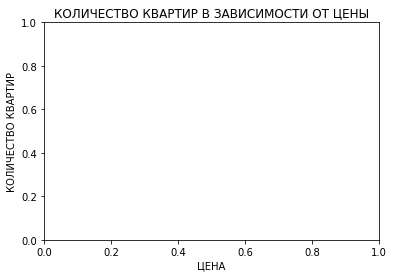

In [19]:
plt.ylabel('КОЛИЧЕСТВО КВАРТИР')
plt.xlabel('ЦЕНА')
plt.title('КОЛИЧЕСТВО КВАРТИР В ЗАВИСИМОСТИ ОТ ЦЕНЫ');

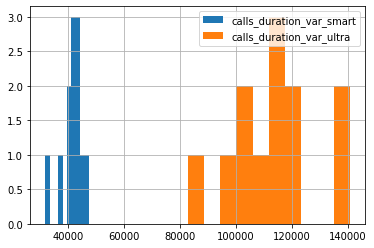

In [20]:
legend=['calls_duration_var_smart','calls_duration_var_ultra']
smart_tariff_users['calls_duration_var'].hist()
ultra_tariff_users['calls_duration_var'].hist()
plt.legend(legend)
plt.show();

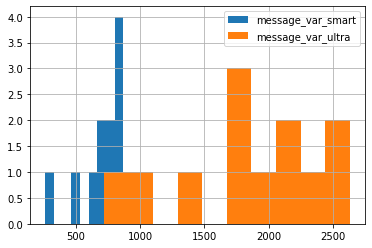

In [21]:
legend=['message_var_smart','message_var_ultra']
smart_tariff_users['message_var'].hist()
ultra_tariff_users['message_var'].hist()
plt.legend(legend)
plt.show();

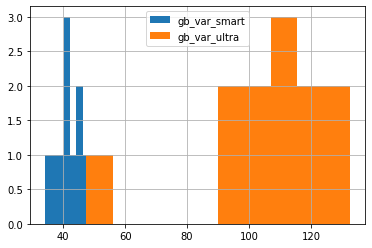

In [22]:
legend=['gb_var_smart','gb_var_ultra']
smart_tariff_users['gb_var'].hist()
ultra_tariff_users['gb_var'].hist()
plt.legend(legend)
plt.show();

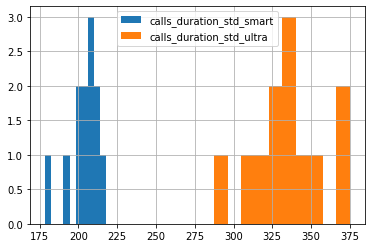

In [23]:
legend=['calls_duration_std_smart','calls_duration_std_ultra']
smart_tariff_users['calls_duration_std'].hist()
ultra_tariff_users['calls_duration_std'].hist()
plt.legend(legend)
plt.show();

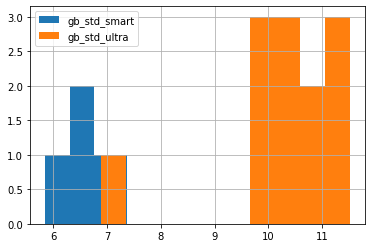

In [24]:
legend=['gb_std_smart','gb_std_ultra']
smart_tariff_users['gb_std'].hist()
ultra_tariff_users['gb_std'].hist()
plt.legend(legend)
plt.show();

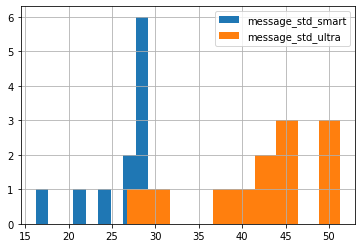

In [25]:
legend=['message_std_smart','message_std_ultra']
smart_tariff_users['message_std'].hist()
ultra_tariff_users['message_std'].hist()
plt.legend(legend)
plt.show();

### Вывод.

- Если сравнить показатели дисперисии и стандартного отклонения по таким показателям как длительность звонка
количество сообщений и количество используемых gb интернета можно предположить что верхняя граница значений для всех трех показателей для тарифа ultra намного больше,нежели верхняя граница тарифа smart. 
- Так же хотелось бы отметить что стандартное отклонение у клиентов тарифа 'smart', по отношению к среднему в целом по таблице больше почти на 0.5 и выше, чем стандартное отклонение у клиентов тарифа 'ultra'.Из этого можно сказать что разброс от среднего намного выше у тарифа 'smart' нежели чем у тарифа 'ultra'.
 

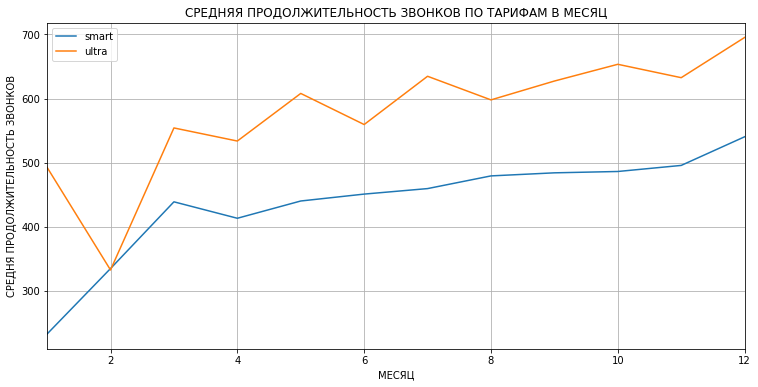

In [26]:
calls_duration_smart = (clients_group.query('tariff == "smart"')
                        .pivot_table(index ='month', values = 'calls_duration', aggfunc = 'mean')
                       )
calls_duration_ultra = (clients_group.query('tariff == "ultra"')
                        .pivot_table(index ='month', values = 'calls_duration', aggfunc = 'mean')
                       )

legend=['smart','ultra']
ax=calls_duration_smart.plot(grid = True, legend = True, alpha = 1, label ='smart')
calls_duration_ultra.plot( grid = True,legend = True, alpha = 1, ax=ax,  figsize=(12.5, 6), label ='ultra')
plt.legend(legend)
plt.ylabel('СРЕДНЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЗВОНКОВ')
plt.xlabel('МЕСЯЦ')
plt.title('СРЕДНЯЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЗВОНКОВ ПО ТАРИФАМ В МЕСЯЦ')
plt.show();

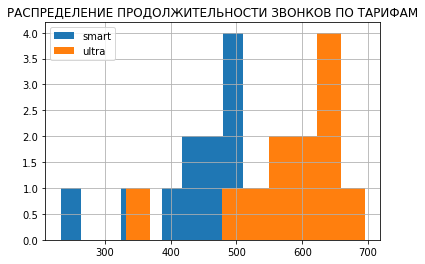

In [27]:
legend=['smart','ultra']
calls_duration_smart['calls_duration'].hist()
calls_duration_ultra['calls_duration'].hist()
plt.legend(legend)
plt.title('РАСПРЕДЕЛЕНИЕ ПРОДОЛЖИТЕЛЬНОСТИ ЗВОНКОВ ПО ТАРИФАМ')
plt.show();

###### Вывод.

Как мы видим из графика выше, пользователи тарифа ultra основном говорят на порядок больше по телефону, нежели пользователи тарифа smart. 

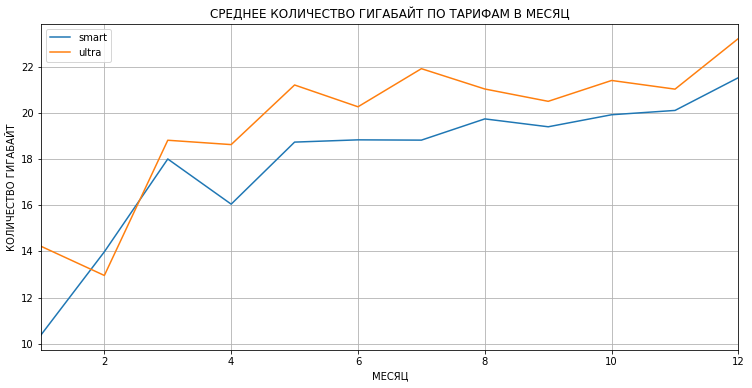

In [28]:
gb_used_smart = clients_group.query('tariff == "smart"').pivot_table(index ='month', values = 'gb_used', aggfunc = 'mean')
gb_used_ultra = clients_group.query('tariff == "ultra"').pivot_table(index ='month', values = 'gb_used', aggfunc = 'mean')

legend=['smart','ultra']
ax=gb_used_smart.plot(grid = True, legend = True, alpha = 1, label = 'smart')
gb_used_ultra.plot( grid = True, legend = True, alpha = 1, ax=ax, label = 'ultra', figsize=(12.5, 6))
plt.legend(legend)
plt.ylabel('КОЛИЧЕСТВО ГИГАБАЙТ')
plt.xlabel('МЕСЯЦ')
plt.title('СРЕДНЕЕ КОЛИЧЕСТВО ГИГАБАЙТ ПО ТАРИФАМ В МЕСЯЦ')
plt.show();

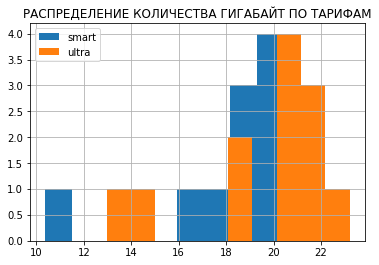

In [29]:
legend=['smart','ultra']
gb_used_smart['gb_used'].hist()
gb_used_ultra['gb_used'].hist()
plt.legend(legend)
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ГИГАБАЙТ ПО ТАРИФАМ')
plt.show();

###### Вывод

Как мы видим из графика выше количество использованных гигабайт у пользователи тарифа "ультра" так же на порядок больше как и на предыдущем графике.

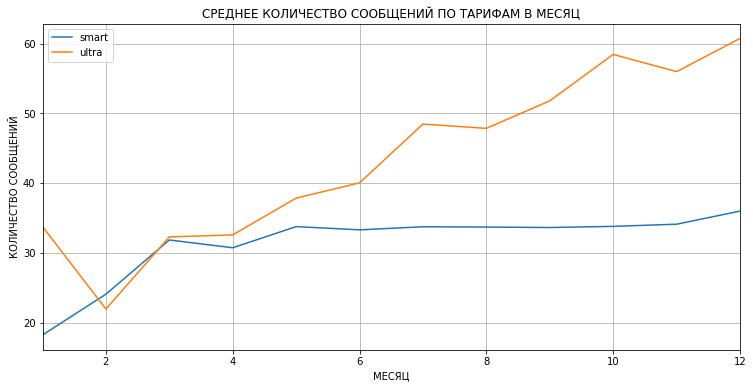

In [30]:
messages_smart = clients_group.query('tariff == "smart"').pivot_table(index ='month', values = 'messages', aggfunc = 'mean')
messages_ultra = clients_group.query('tariff == "ultra"').pivot_table(index ='month', values = 'messages', aggfunc = 'mean')

legend=['smart','ultra']
ax = messages_smart.plot( grid = True, legend = True,label = 'smart', alpha = 1)
messages_ultra.plot( grid = True, legend = True, alpha = 1, label = 'ultra', ax=ax, figsize=(12.5, 6))
plt.legend(legend)
plt.ylabel('КОЛИЧЕСТВО СООБЩЕНИЙ')
plt.xlabel('МЕСЯЦ')
plt.title('СРЕДНЕЕ КОЛИЧЕСТВО СООБЩЕНИЙ ПО ТАРИФАМ В МЕСЯЦ')
plt.show();

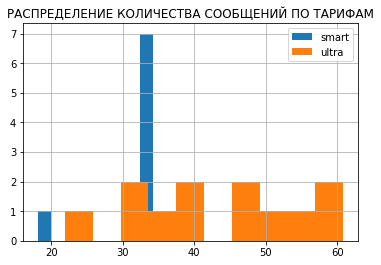

In [31]:
legend=['smart','ultra']
messages_smart['messages'].hist()
messages_ultra['messages'].hist()
plt.legend(legend)
plt.title('РАСПРЕДЕЛЕНИЕ КОЛИЧЕСТВА СООБЩЕНИЙ ПО ТАРИФАМ')
plt.show();

###### Вывод

Количество соообщений - это  единственный показатель, где средние значения по показателю пользователи тарифа "ультра",уступают.А именно в начале календарного года.Но к декабрю картина становится похожей на показатели  'gb_used' и 'calls_duration'. Так же можно отметить что значительная доля пользователей тарифа smart  чаще отправляют больше 30 сообщений.

Построим график по выручке компаний с разбиением по тарифу

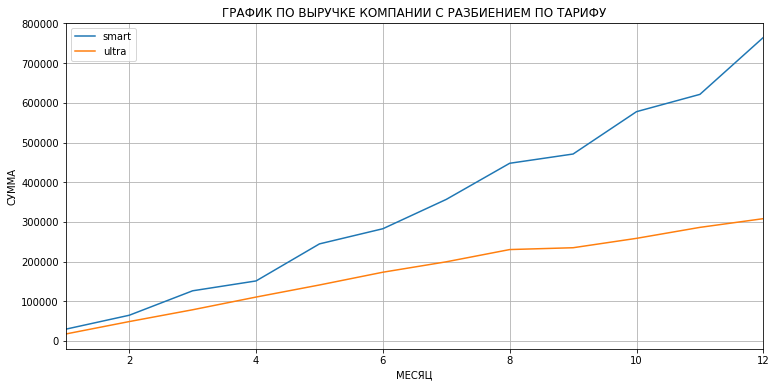

In [32]:
revenue_duration_smart = (clients_group.query('tariff == "smart"')
                        .pivot_table(index ='month', values = 'revenue_per_month', aggfunc = 'sum')
                       )
revenue_duration_ultra = (clients_group.query('tariff == "ultra"')
                        .pivot_table(index ='month', values = 'revenue_per_month', aggfunc = 'sum')
                       )
legend=['smart','ultra']
ax =revenue_duration_smart.plot( grid = True, legend = True,label = 'smart', alpha = 1)
revenue_duration_ultra.plot( grid = True, legend = True, alpha = 1, label = 'ultra', ax=ax, figsize=(12.5, 6))
plt.legend(legend)
plt.xlabel('МЕСЯЦ')
plt.ylabel('СУММА')
plt.title('ГРАФИК ПО ВЫРУЧКЕ КОМПАНИИ С РАЗБИЕНИЕМ ПО ТАРИФУ')
plt.show();

Выручка за период по выборке тариф ULTRA

In [33]:
tariff_ultra = clients_group.query('tariff == "ultra"')
revenue_ultra_list = list(tariff_ultra['revenue_per_month'])

np_mean_ultra = np.sum(revenue_ultra_list)
np_mean_ultra

2086850

Выручка за период по выборке тариф SMART

In [34]:
tariff_smart = clients_group.query('tariff == "smart"')
revenue_smart_list = list(tariff_smart['revenue_per_month'])

np_mean_smart = np.sum(revenue_smart_list)
np_mean_smart

4138137

###### Вывод.

Как нам видно из графика, а так же блогадаря нашим вычислениям тариф ultra значительно уступает тарифу smart по выручке.Это можно объяснить тем, что большая часть пользователей предпочитают менее дешевый тарифы.

### 4) Формулировка и проверка гипотез.

###### Гипотеза № 1

Проверим равенство средних значений по выручке пользователей из каждого тарифа 
   - Гипотеза H₀: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны
   - Гипотеза H₁: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается

Создадим списки со всем значениями выручки для пользователей smart и ultra.

In [35]:
tariff_smart = clients_group.query('tariff == "smart"')
revenue_smart_list = list(tariff_smart['revenue_per_month'])

tariff_ultra = clients_group.query('tariff == "ultra"')
revenue_ultra_list = list(tariff_ultra['revenue_per_month'])

alpha = 0.05
results =st.ttest_ind(revenue_smart_list,revenue_ultra_list,equal_var = False)

print('p-значение:',results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.441825059787511e-25
Отвергаем нулевую гипотезу


###### Вывод:
Как мы видим из вычислений, наша нулевая гипотеза не подтвердилась.
А значит средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Этого и следовало ожидать, учитывая разные условия тарифов.

###### Гипотеза № 2

   - Гипотеза H₀: Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
   - Гипотеза H₁: Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

In [36]:
Moscow = clients_group.query('city == "Москва"')
Moscow_revenue_per_month_list = list(Moscow['revenue_per_month'])

Another_cities = clients_group.query('city != "Москва"')
Another_cities_revenue_per_month_list = list(Another_cities['revenue_per_month'])

alpha = 0.05
results =st.ttest_ind(Moscow_revenue_per_month_list,Another_cities_revenue_per_month_list,equal_var = False)

print('p-значение:',results.pvalue) 

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8976276408563587
Не получилось отвергнуть нулевую гипотезу


### Вывод:
Как мы видим из вычислений, наша нулевая гипотеза подтвердилась.
А значит средняя выручка пользователей Москвы и пользователей из других регионов не различается.

# Общий вывод.

Для решения поставленной задачи мы сделали следующее:
- 1) Анализ данных
- 2) Определение аномалий, замена пропусков.
- 3) Вычисление и добавление таких дополнительных показателей как средняя вырчука по месяца по каждому тарифу, вычисление среднего, дисперсии и стандартного отклонения по таким показателям как длительность звонков, количество сообщений и количетво использованых гигабайт.Приведение всех данных к оптимальному виду
- 4) Построение графиков по каждому показателю и по каждому тарифу.
На основе этих действий мы можем сказать что оба тарифных плана приносят в среднем не одинаковое количество выручки.По моим подсчетам примерная выручка за период по выборке больше у тарифа "SMART".
Но в свою очередь считаю обоснованым оставить оба тарифных плана.Так как оба тарифных плана охватывают две разные категории людей относительно  их финансового состояния.Иными слова, если убрать один из тарифных планов мы потерям львиную долю наших клиентов, которые могут не захотеть выбирать другой наш тариф, и которые просто могут выбрать наших конкурентов.  